# Linear Regression

In [0]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()


print("summary()\n",est2.summary())
# print("Intercept and Coefficients\n",est2.params)
# print("Standard Errors\n",est2.bse)
# print("tvalues\n",est2.tvalues)
# print("pvalues\n",est2.pvalues)
# print("rsquared\n",est2.rsquared)
# print("rsquared_adj\n",est2.rsquared_adj)
est2.bse
for attr in dir(est2):
    if not attr.startswith('_'):
        print(attr)
predictions = est2.predict(X2)

#print(est2.predict(X2[:3,:]))
from sklearn.metrics import r2_score,mean_squared_error
print("r2_score",r2_score(y,predictions))
#slope, intercept, r_value, p_value, std_err = stats.linregress(X2[:,1],y)
#print(slope, intercept, r_value, p_value, std_err)
d1 = pd.DataFrame(X2)
d2 = pd.DataFrame(y)
d1['y'] = y
d1.columns = d1.columns.map(str)
# Plot all independent variables on plot to see check the linearity
# for i in range(len(diabetes.feature_names)):
#     plt.scatter(X[:,i],y)
#     plt.xlabel(diabetes.feature_names[i])
#     sns.lmplot(x=str(i+1), y='y', data=d1)
#     plt.show()

#print(est2.resid)
#sns.residplot(d1['9'],d1['y'],)

In [153]:
d1.head()

,0,1,2,3,4,5,6,7,8,9,10,y
0,1.0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,1.0,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,1.0,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,1.0,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,1.0,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Analysis Tests and Visualizations

### displot, stats.probplot()

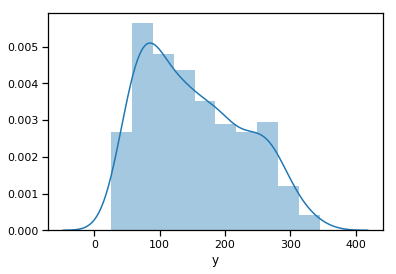

In [160]:
sns.distplot(d1['y'])

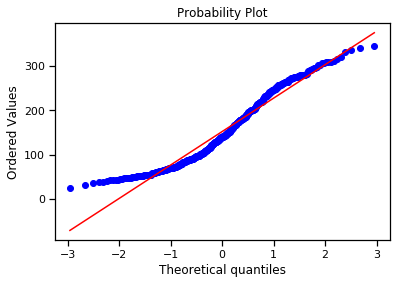

In [164]:
res = stats.probplot(d1['y'], plot=plt)

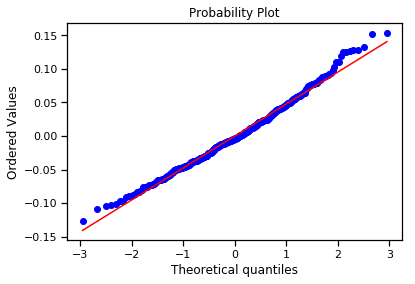

In [165]:
res = stats.probplot(d1['5'], plot=plt)

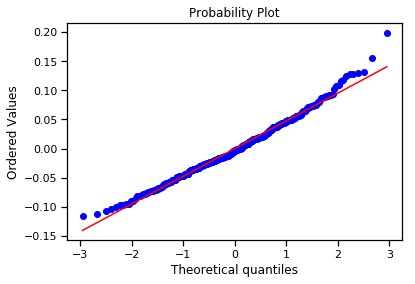

In [166]:
res = stats.probplot(d1['6'], plot=plt)

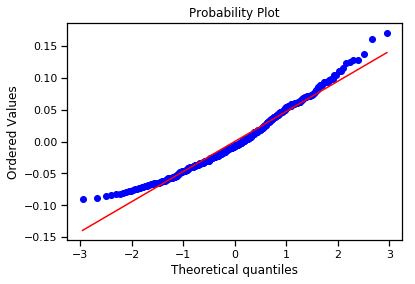

In [167]:
res = stats.probplot(d1['3'], plot=plt)

### residplot , regplot, lmplot

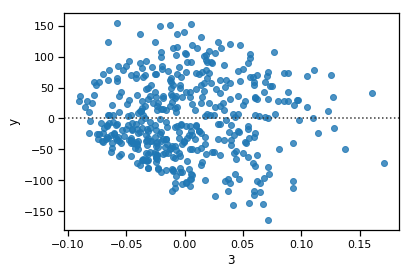

In [156]:
sns.residplot(x="3", y="y", data=d1);

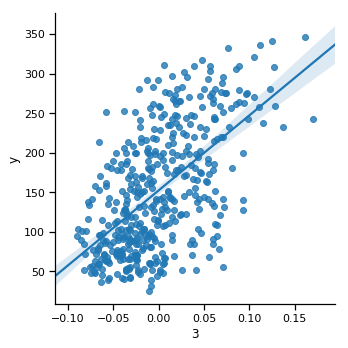

In [157]:
sns.lmplot(x="3", y="y", data=d1);

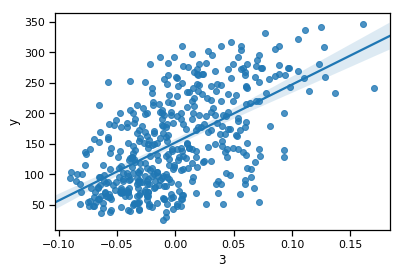

In [158]:
sns.regplot(x="3", y="y", data=d1);

### Variance Inflation Factor VIF

In [9]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(d1.values, i) for i in range(d1.shape[1])]
vif["features"] = d1.columns
vif

,VIF Factor,features
0,9.093393,0
1,1.217386,1
2,1.323574,2
3,1.723241,3
4,1.542681,4
5,59.700276,5
6,39.374197,6
7,15.410430,7
8,8.915790,8
9,10.522763,9


In [8]:
vif.round(1)

,VIF Factor,features
0,9.1,0
1,1.2,1
2,1.3,2
3,1.7,3
4,1.5,4
5,59.7,5
6,39.4,6
7,15.4,7
8,8.9,8
9,10.5,9


### Pearson's Correlation Coefficient

In [18]:
from scipy.stats.stats import pearsonr
pearsonr_coefficient, p_value = pearsonr(X2[:,5],X2[:,6])
pearsonr_coefficient,p_value

(0.8966629578104897, 8.341806776821094e-158)

In [125]:
www= pd.DataFrame(columns = d1.columns)
for i in np.arange(1,len(d1.columns)):
  j = i+1
  zz = [{(d1.columns[i],d1.columns[j]):pearsonr(d1.iloc[:,i],d1.iloc[:,j])[1]} for j in np.arange(j,len(d1.columns))]
  print(i,zz)

pearsonr(d1.iloc[:,10],d1.iloc[:,11])

1
1 [{('1', '2'): 0.00024234250279137444}, {('1', '3'): 9.076791865412659e-05}, {('1', '4'): 4.393220171869469e-13}, {('1', '5'): 2.894153628974411e-08}, {('1', '6'): 3.2713910955925382e-06}, {('1', '7'): 0.11448567325766316}, {('1', '8'): 1.5687877872795756e-05}, {('1', '9'): 7.248756056496383e-09}, {('1', '10'): 9.347961163037609e-11}, {('1', 'y'): 7.055686149112959e-05}]
2
2 [{('2', '3'): 0.06404795642080614}, {('2', '4'): 2.9213011835596487e-07}, {('2', '5'): 0.45943181781626924}, {('2', '6'): 0.002649987373564688}, {('2', '7'): 1.4868400038918093e-16}, {('2', '8'): 7.667029937609012e-13}, {('2', '9'): 0.0015734075517597253}, {('2', '10'): 1.0253120038438108e-05}, {('2', 'y'): 0.3664292946517888}]
3
3 [{('3', '4'): 5.408803374731561e-18}, {('3', '5'): 1.0321523755187962e-07}, {('3', '6'): 2.5149089940334865e-08}, {('3', '7'): 1.5944913641317079e-15}, {('3', '8'): 1.0311961813108757e-19}, {('3', '9'): 5.2347958854250776e-23}, {('3', '10'): 2.1706571970966966e-17}, {('3', 'y'): 3.466

(0.38248348424858103, 7.58008326608111e-17)

### Correlation Heatmaps

          1         2         3         4  ...         8         9        10      y
0  0.038076  0.050680  0.061696  0.021872  ... -0.002592  0.019908 -0.017646  151.0
1 -0.001882 -0.044642 -0.051474 -0.026328  ... -0.039493 -0.068330 -0.092204   75.0
2  0.085299  0.050680  0.044451 -0.005671  ... -0.002592  0.002864 -0.025930  141.0
3 -0.089063 -0.044642 -0.011595 -0.036656  ...  0.034309  0.022692 -0.009362  206.0
4  0.005383 -0.044642 -0.036385  0.021872  ... -0.002592 -0.031991 -0.046641  135.0

[5 rows x 11 columns]
           1         2         3  ...         9        10         y
1   1.000000  0.173737  0.185085  ...  0.270777  0.301731  0.187889
2   0.173737  1.000000  0.088161  ...  0.149918  0.208133  0.043062
3   0.185085  0.088161  1.000000  ...  0.446159  0.388680  0.586450
4   0.335427  0.241013  0.395415  ...  0.393478  0.390429  0.441484
5   0.260061  0.035277  0.249777  ...  0.515501  0.325717  0.212022
6   0.219243  0.142637  0.261170  ...  0.318353  0.290600  0.1740

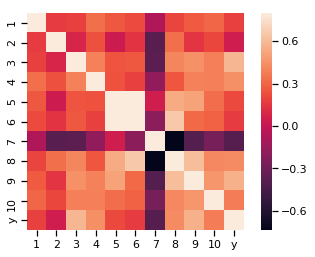

In [42]:
def plot_Correlation_Coefficient_2(corr):
    sns.heatmap(corr, vmax=.8, square=True);
    plt.show()
corr = d1.iloc[:,1:].corr()
print(d1.iloc[:,1:].head())
print(corr)
plot_Correlation_Coefficient_2(corr)

In [0]:
def plot_Correlation_Coefficient_1(corr):
    sns.set_context(context='notebook')
    fig, ax = plt.subplots(figsize=(10,10)) 

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.tril_indices_from(mask)] = True

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)
    plt.show()
plot_Correlation_Coefficient_1(corr)

### Pairplot /  Scatter matrix

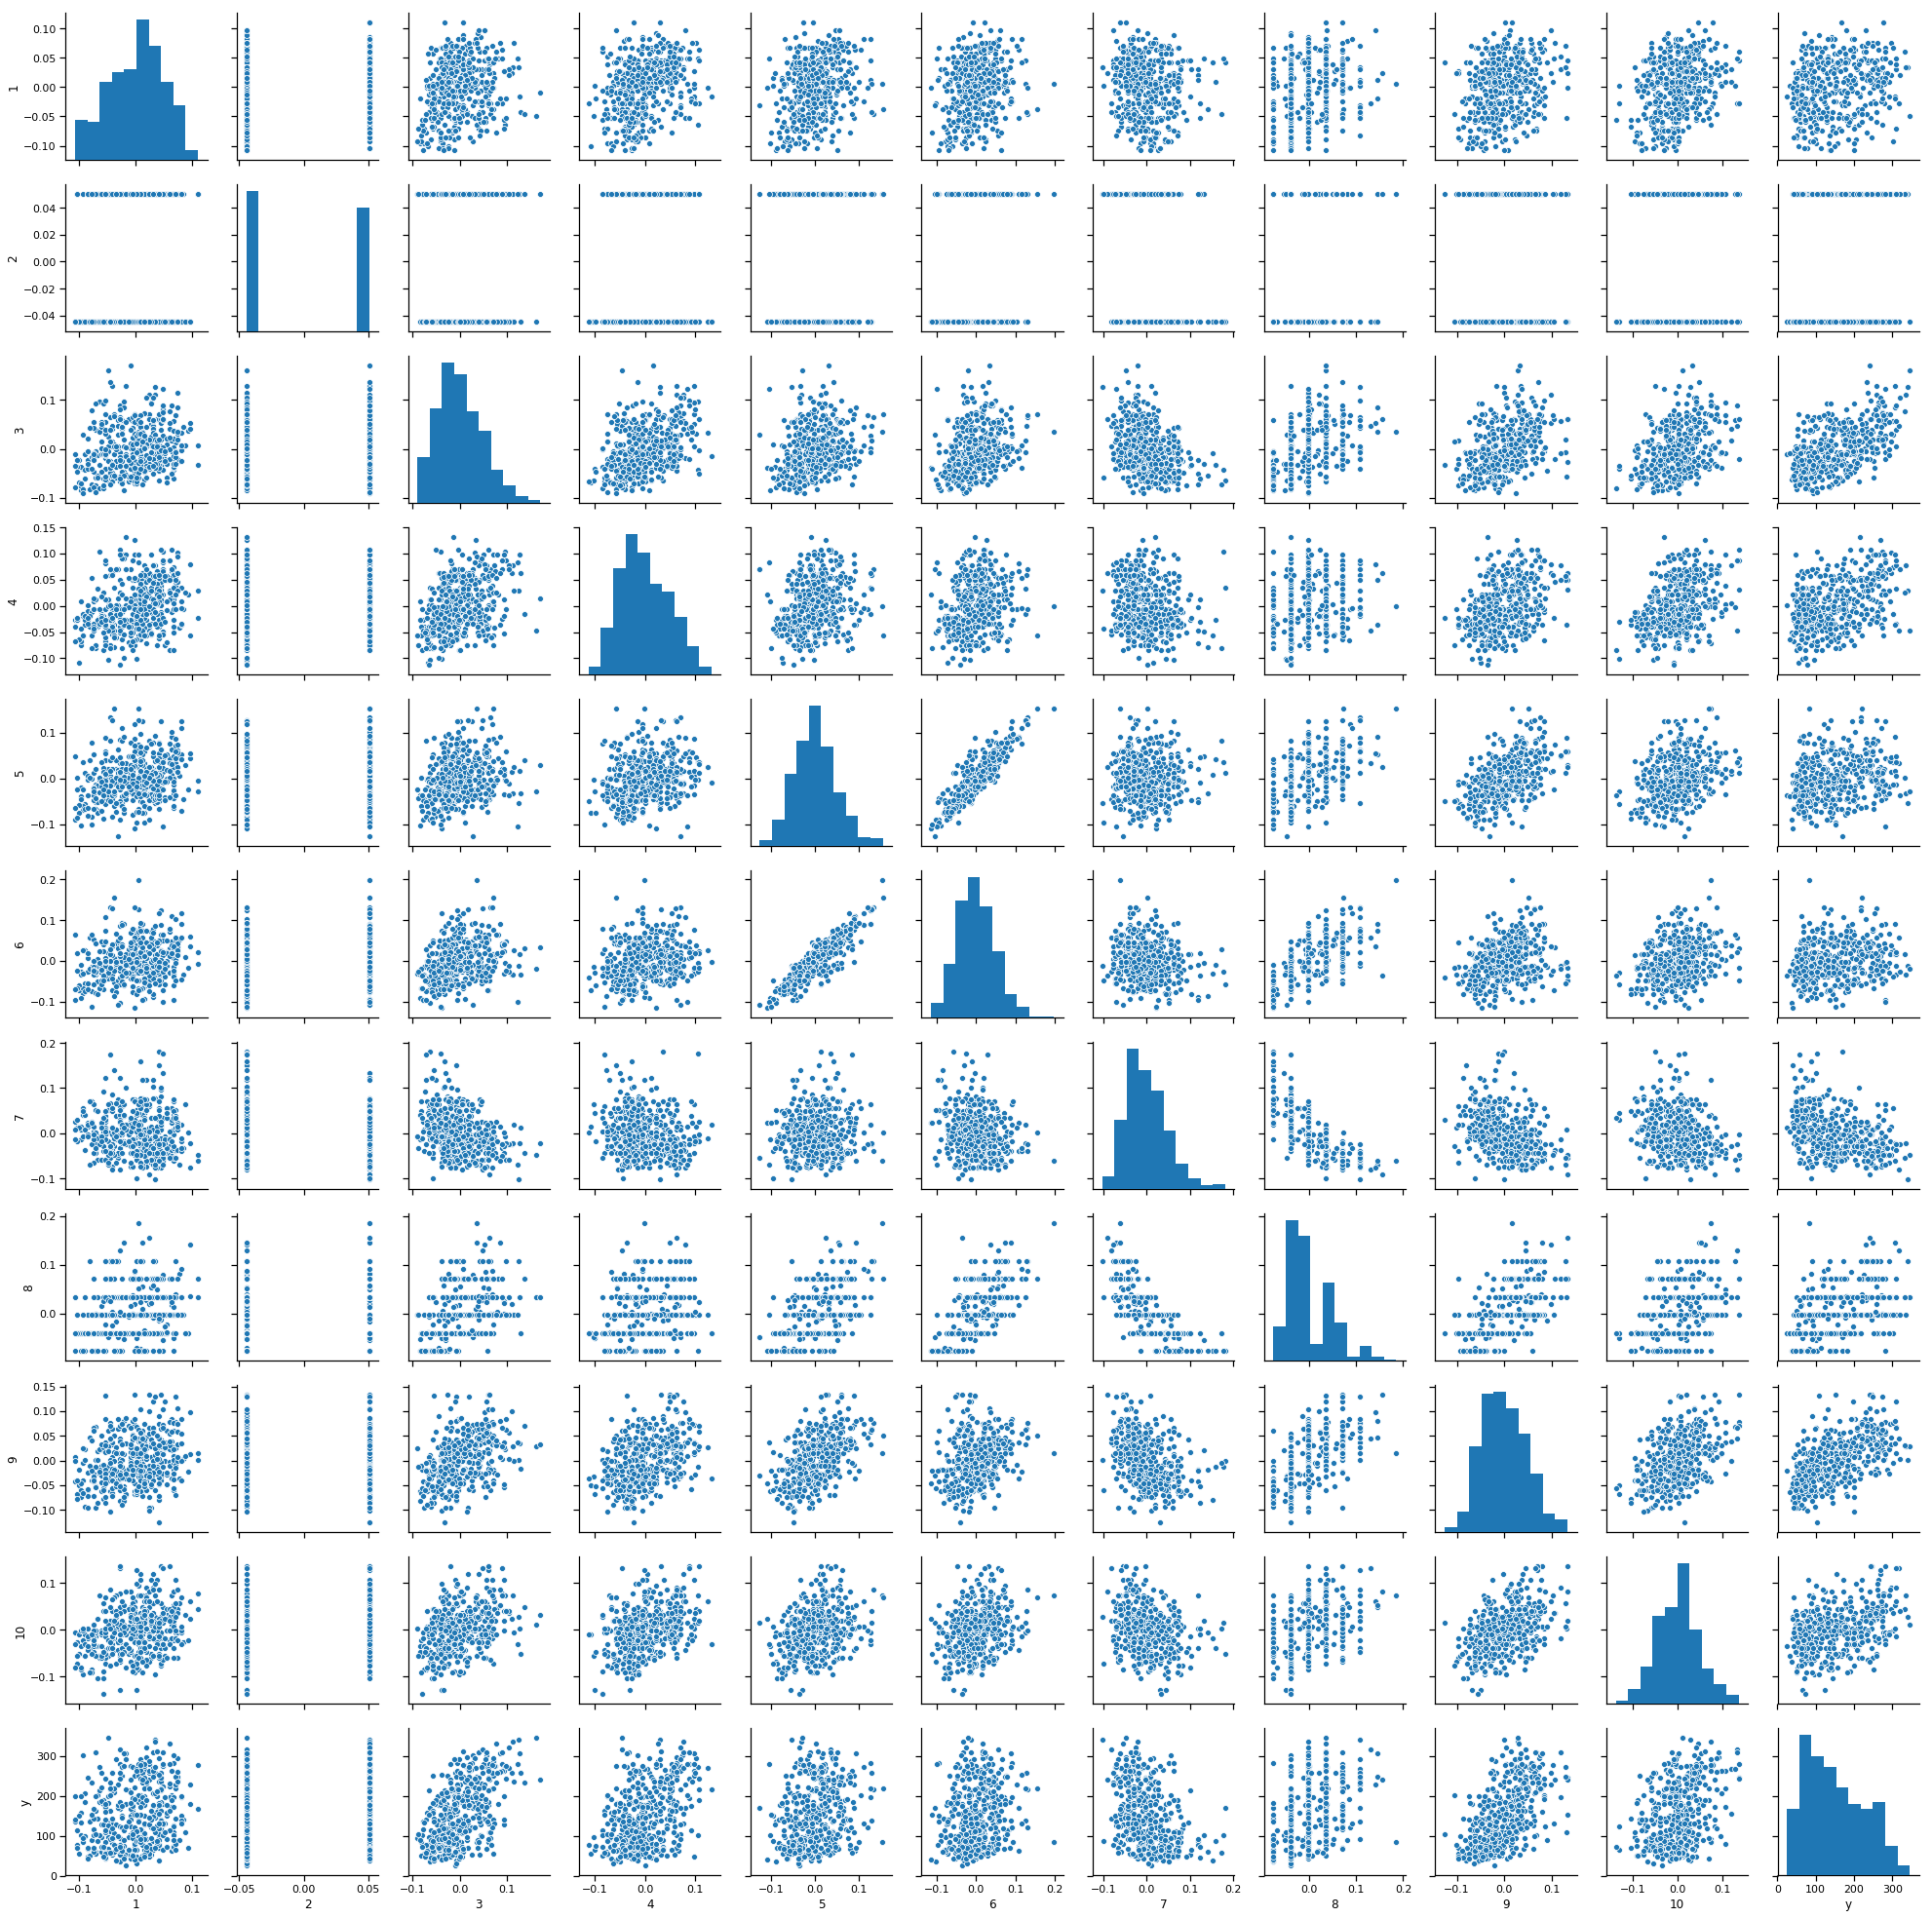

In [149]:
sns.pairplot(d1.iloc[:,1:])

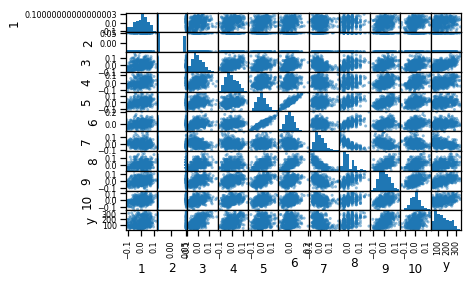

In [151]:
pd.plotting.scatter_matrix(d1.iloc[:,1:]); 

### Spearman`s rank correlation

In [170]:
from scipy.stats import spearmanr
spearmanr_coefficient, p_value = spearmanr(d1['5'], d1['6'])
print("p_value ",p_value)
print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

p_value  1.842269343143993e-143
Spearman Rank Correlation Coefficient 0.879


In [171]:
from scipy.stats import spearmanr
spearmanr_coefficient, p_value = spearmanr(d1['5'], d1['2'])
print("p_value ",p_value)
print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

p_value  0.5600903266435973
Spearman Rank Correlation Coefficient 0.028


### CHI-SQUARE(X²) TEST

In [176]:
from scipy.stats import chi2_contingency
table = pd.crosstab(d1['5'], d1['6'])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))
chi2, p, dof, expected
#	>>>Chi-square Statistic 8.741 p_value 0.013

Chi-square Statistic 46043.070 p_value 0.000


(46043.06984126984,
 3.0645090486044e-39,
 42140,
 array([[0.00226244, 0.00226244, 0.00226244, ..., 0.00226244, 0.00226244,
         0.00226244],
        [0.00226244, 0.00226244, 0.00226244, ..., 0.00226244, 0.00226244,
         0.00226244],
        [0.00226244, 0.00226244, 0.00226244, ..., 0.00226244, 0.00226244,
         0.00226244],
        ...,
        [0.00226244, 0.00226244, 0.00226244, ..., 0.00226244, 0.00226244,
         0.00226244],
        [0.00226244, 0.00226244, 0.00226244, ..., 0.00226244, 0.00226244,
         0.00226244],
        [0.00226244, 0.00226244, 0.00226244, ..., 0.00226244, 0.00226244,
         0.00226244]]))

In [175]:
from scipy.stats import chi2_contingency
table = pd.crosstab(d1['5'], d1['2'])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square Statistic %0.3f p_value %0.3f' % (chi2, p))
chi2, p, dof, expected

Chi-square Statistic 140.096 p_value 0.482


(140.09639072842282, 0.4818099884503997, 140, array([[0.53167421, 0.46832579],
        [0.53167421, 0.46832579],
        [0.53167421, 0.46832579],
        [0.53167421, 0.46832579],
        [0.53167421, 0.46832579],
        [1.06334842, 0.93665158],
        [0.53167421, 0.46832579],
        [1.06334842, 0.93665158],
        [0.53167421, 0.46832579],
        [0.53167421, 0.46832579],
        [1.06334842, 0.93665158],
        [0.53167421, 0.46832579],
        [0.53167421, 0.46832579],
        [2.12669683, 1.87330317],
        [0.53167421, 0.46832579],
        [1.59502262, 1.40497738],
        [1.06334842, 0.93665158],
        [0.53167421, 0.46832579],
        [0.53167421, 0.46832579],
        [0.53167421, 0.46832579],
        [2.65837104, 2.34162896],
        [2.12669683, 1.87330317],
        [0.53167421, 0.46832579],
        [1.06334842, 0.93665158],
        [1.59502262, 1.40497738],
        [1.06334842, 0.93665158],
        [0.53167421, 0.46832579],
        [1.06334842, 0.93665158],
   

### sm.graphics.plot_regress_exog

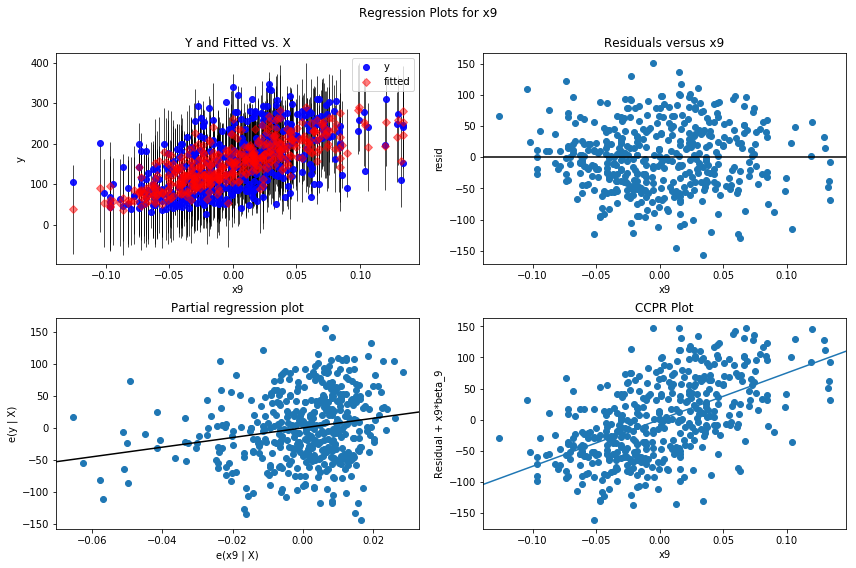

In [0]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(est2, 9, fig=fig)

### Summary

In [240]:
print("summary()\n",est2.summary())

summary()
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           3.83e-62
Time:                        10:18:19   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.0

### Additional Tests Influence, Leverage, Outliers, Cook's Distance, het_goldfeldquandt, het_breuschpagan

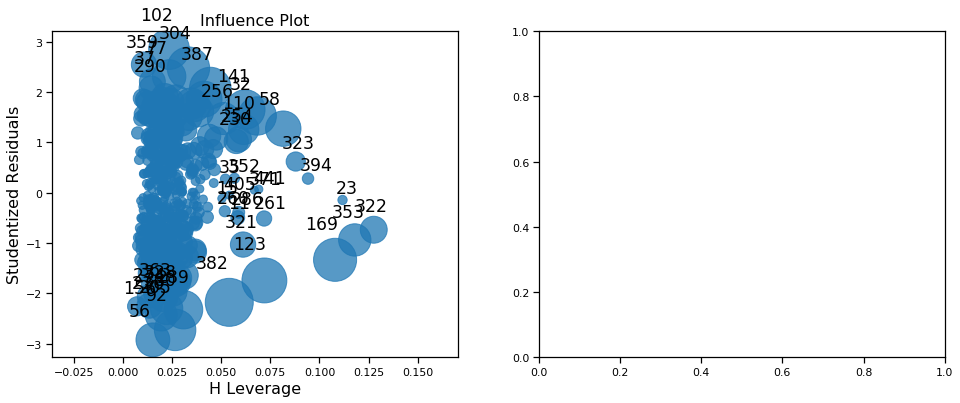

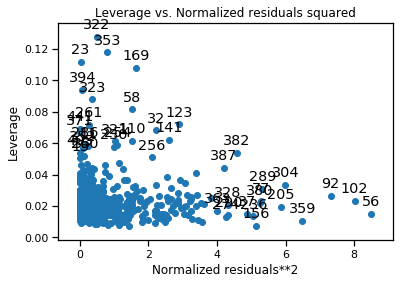

In [179]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
# fig, ax = plt.subplots(figsize=(8,6))
# fig = plot_leverage_resid2(est2, ax = ax)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))

ax1 = sm.graphics.influence_plot(est2, ax=ax1, criterion="cooks")
ax2 = sm.graphics.plot_leverage_resid2(est2, ax=ax2)

In [0]:
from statsmodels.stats.outliers_influence import summary_table
st, data, ss2 = summary_table(est2, alpha=0.05)
print(st, data, ss2)

<StemContainer object of 3 artists>

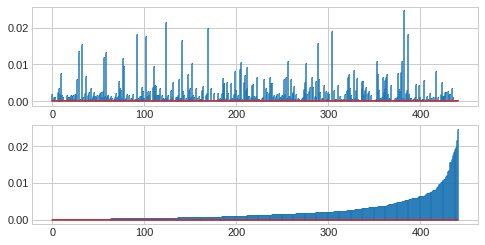

In [0]:
influence = est2.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
fig, (ax1, ax2) = plt.subplots(2,1)
plt.rcParams['figure.figsize'] = 8, 4
plt.style.use('seaborn-whitegrid')
ax1.stem(np.arange(len(c)), c, markerfmt=",")
ax2.stem(np.arange(len(c)), np.sort(c), markerfmt=",")

In [0]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(est2.resid, est2.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 26.14679144370297),
 ('p-value', 0.0035476957582630322),
 ('f-value', 2.7099146719004765),
 ('f p-value', 0.003096456019249622)]

In [0]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(est2.resid, est2.model.exog)
lzip(name, test)

[('F statistic', 0.9673325685917769), ('p-value', 0.5949738916923373)]

## Evaluation Metrices

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,explained_variance_score,max_error,mean_squared_log_error,median_absolute_error

In [191]:
explained_variance_score(y, predictions)	#Explained variance regression score function

0.5177494254132934

In [192]:
mean_absolute_error(y, predictions)

43.277395083749866

In [193]:
mean_squared_error(y, predictions)	

2859.6903987680657

In [194]:
r2_score(y, predictions)

0.5177494254132934

In [195]:
max_error(y, predictions)

155.82899729576542

In [196]:
mean_squared_log_error(y, predictions)

0.17215834438973376

In [197]:
median_absolute_error(y, predictions)

38.522833662660105

In [198]:
print("summary()\n",est2.summary())

summary()
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Fri, 19 Jul 2019   Prob (F-statistic):           3.83e-62
Time:                        09:01:52   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.0

## References:

References:

---

[statsmodels](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html)

[outliers](https://songhuiming.github.io/pages/2016/11/27/linear-regression-in-python-outliers-leverage-detect/)

The rsquared values is 0.5759696028216694


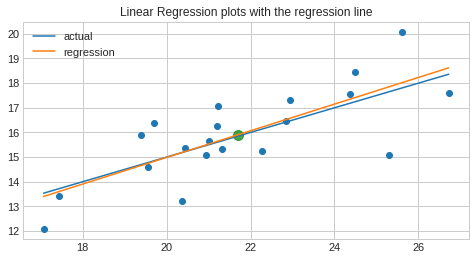

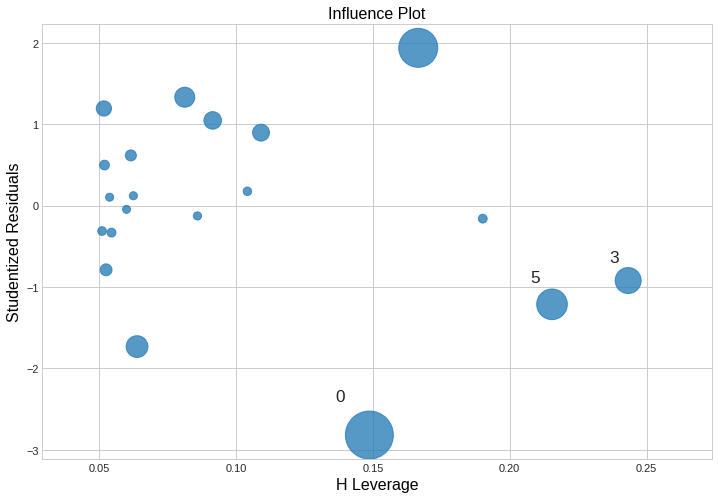

In [227]:
np.random.seed(0)
x1 = np.random.normal(20, 3, 20) #mean,std,size
y0 = 5 + 0.5 * x1
y1 = 5 + 0.5 * x1 + np.random.normal(0, 1, 20)
lm = sm.OLS(y1, sm.add_constant(x1)).fit()
print( "The rsquared values is " + str(lm.rsquared))

plt.scatter(np.sort(x1), y1[np.argsort(x1)])
plt.scatter(np.mean(x1), np.mean(y1), color = "green",s=100,alpha=.7)

plt.plot(np.sort(x1), y0[np.argsort(x1)], label = "actual")

plt.plot(np.sort(x1), lm.predict()[np.argsort(x1)], label = "regression")

plt.title("Linear Regression plots with the regression line")
plt.legend()

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(lm, alpha  = 0.05, ax = ax, criterion="cooks")